In [62]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

In [61]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [16]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [20]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [21]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [22]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [23]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [56]:
# Create our session (link) from Python to the DB
session = Session(engine)
# conn = engine.connect()

# Exploratory Precipitation Analysis

In [43]:
# Find the most recent date in the data set.
#for row in session.query(Measurement.date).limit(1).all():
for row_date, in session.query(Measurement.date).order_by(Measurement.date.desc()).limit(1):    
    print(row_date)
    
# https://stackoverflow.com/questions/20937866/sqlalchemy-get-the-object-with-the-most-recent-date   

2017-08-23


In [52]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1d70caa40f0>,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08}

In [26]:
# first_row = session.query(Station).first()
# first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1d70ca97e10>,
 'longitude': -157.8168,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

In [53]:
print(row_date)

2017-08-23


In [105]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
#  from https://docs.sqlalchemy.org/en/13/orm/tutorial.html#common-filter-operators
# row_date
# Calculate the date one year from the last date in data set.
from datetime import  timedelta
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

# Perform a query to retrieve the data and precipitation scores
dates_precipitations =session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date>= query_date,Measurement.date<= row_date,).\
    order_by(Measurement.date).all()

# session.query(Dow.date).\
#     filter(Dow.date > '2016-08-23').\
#     order_by(Dow.date).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
# Unpack the `emoji_id` and `scores` from results and save into separate lists
dates = [result[0] for result in dates_precipitations[:2230]]
precipitations = [result[1] for result in dates_precipitations[:2230]]

# df_result = pd.DataFrame()
# for row in df.itertuples(): 
#     df_temp = pd.read_sql(row.dates_precipitations, engine) 
#     df_result = df_result.append(df_temp)

df =pd.DataFrame({'date':dates,'precipitation':precipitations,
                 })
df
# Sort the dataframe by date

df =df.sort_values(by = "date")
df['date'] = pd.to_datetime(df['date'])
df.head(5)
print(df.info())

Query Date:  2016-08-23
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2230 non-null   datetime64[ns]
 1   precipitation  2021 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 52.3 KB
None


In [128]:
df.fillna(0, inplace =True)


In [138]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2230 non-null   datetime64[ns]
 1   precipitation  2230 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 52.3 KB
None


In [139]:
df2 =df.copy()


In [140]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2230 non-null   datetime64[ns]
 1   precipitation  2230 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 52.3 KB
None


In [141]:
len(df2)//12

185

In [160]:
round(max(df2['precipitation']))

7

In [166]:
max(df2['date'])

Timestamp('2017-08-23 00:00:00')

<Figure size 432x288 with 0 Axes>

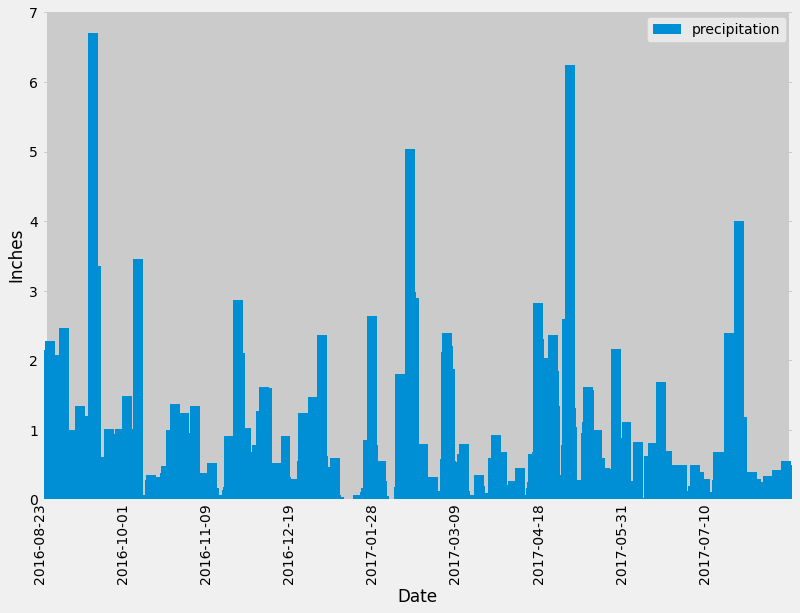

In [245]:
# Use Pandas Plotting with Matplotlib to plot the data
# https://stackoverflow.com/questions/30133280/pandas-bar-plot-changes-date-format
plt.figure()
#df2 =df.dropna(axis=0)
ax =df2.plot(kind='bar', x ='date', y ='precipitation',width =30,grid =True, figsize =(12,10))
ax.grid(True)
# Set x and y limits

#plt.xlim(datenum(dt.date(2016,8,22)), datenum(dt.date(2017,8,24)))  
#plt.xlim(pd.Timestamp('2016-08-22'), pd.Timestamp('2017-08-24'))


##plt.ylim(-0.25, round(max(df2['precipitation'])))

#plt.xlim(xmin =dt.date(2016,8,22), xmax=dt.date(2017,8,24))

## datemin = np.datetime64(df2['date'][0], 'D')- np.timedelta64(1, 'D')
## datemax = np.datetime64(df2['date'][-1], 'D') + np.timedelta64(1, 'D')
## #ax.set_xlim(datemin, datemax)
# plt.xlim(datemin, datemax)

#plt.ylim(-0.25,7)
# # Make ticks on occurrences of each month:
# ax.xaxis.set_major_locator(mdates.MonthLocator())
# #plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# # Get only the month to show in the x-axis:
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# #ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')





# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels = ['']*len(df2['date'])
# Every 4th ticklable shows the month and day
#ticklabels[::4] = [item.strftime('%b %d') for item in df_ts.index[::4]]
#len(df2)//12
# Every 30th ticklabel includes the year
ticklabels[::250] = [item.strftime('%Y-%m-%d') for item in df2['date'][::250]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate(rotation =90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.savefig('./Images/monthly_precipitation.png')
plt.show()

In [ ]:
plt.figure()
#df2 =df.dropna(axis=0)
ax1 =df2.plot(kind='bar', x ='date', y ='precipitation',width =30,grid =True, figsize =(10,10))

# # Make ticks on occurrences of each month:
# ax.xaxis.set_major_locator(mdates.MonthLocator())
# #plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# # Get only the month to show in the x-axis:
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# #ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')





# Make most of the ticklabels empty so the labels don't get too crowded
# ticklabels = ['']*len(df2['date'])
# # Every 4th ticklable shows the month and day
# #ticklabels[::4] = [item.strftime('%b %d') for item in df_ts.index[::4]]
# #len(df2)//12
# # Every 30th ticklabel includes the year
# ticklabels[::250] = [item.strftime('%Y-%m-%d') for item in df2['date'][::250]]
# ax1.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate(rotation =90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()

In [250]:
# Use Pandas to calculate the summary statistics for the precipitation data
df2['precipitation'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
precipitation,2230.0,0.160664,0.442067,0.0,0.0,0.01,0.11,6.7


# Exploratory Station Analysis

In [189]:
# Design a query to calculate the total number stations in the dataset
#session.query(Measurement.station).count()    
session.query(func.count(Measurement.station)).all()

[(19550)]

In [188]:
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [195]:
session.query( Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [217]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Station.name, Measurement.station,\
              func.count(Measurement.station)).\
                  join(Station,Measurement.station==Station.station).\
                      group_by(Measurement.station).\
                          order_by(func.count(Measurement.station).desc()).all()

[('WAIHEE 837.5, HI US', 'USC00519281', 2772),
 ('WAIKIKI 717.2, HI US', 'USC00519397', 2724),
 ('KANEOHE 838.1, HI US', 'USC00513117', 2709),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523', 2669),
 ('MANOA LYON ARBO 785.2, HI US', 'USC00516128', 2612),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 'USC00514830', 2202),
 ('HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918', 1979),
 ('PEARL CITY, HI US', 'USC00517948', 1372),
 ('UPPER WAHIAWA 874.3, HI US', 'USC00518838', 511)]

In [204]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query( Measurement.station, func.count(Measurement.station),func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).limit(1).all()

[('USC00519281', 2772, 54.0, 85.0, 71.66378066378067)]

In [215]:
session.query(Station.name, Measurement.station,\
              func.count(Measurement.station),\
              func.min(Measurement.tobs),\
              func.max(Measurement.tobs),\
              func.avg(Measurement.tobs)).\
                  join(Station,Measurement.station==Station.station).\
                      group_by(Measurement.station).\
                          order_by(func.count(Measurement.station).desc()).\
                              limit(1).all()


[('WAIHEE 837.5, HI US', 'USC00519281', 2772, 54.0, 85.0, 71.66378066378067)]

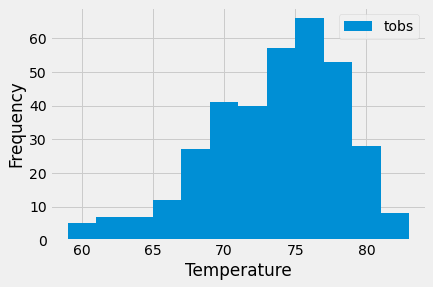

In [244]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
monthly_temp =session.query(Measurement.date, Measurement.tobs ).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date>= query_date,Measurement.date<= row_date).\
order_by(Measurement.date).all()

# Load the results into a pandas dataframe.
monthly_temp_df = pd.DataFrame(monthly_temp[:-1], columns=['daily_date', 'tobs'])
#monthly_temp_df.set_index('daily_date', inplace=True, )
monthly_temp_df.head(10)
monthly_temp_df.plot(kind ='hist', bins =12)
plt.xlabel('Temperature')
plt.savefig('./Images/monthly_temp.png')

plt.show()

# Close session

In [253]:
# Close Session
session.close()